In [495]:
%matplotlib inline

## Standard imports

In [496]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.linalg as linalg
import numpy as np
import scipy as scp

np.random.seed(31415926)

## Utility functions

In [497]:
def mv_normal(m, C):
    """ Samples a multivariate normal of mean m and covariance C
    Example:
    >>> m = np.array([0., 0.])
    >>> C = np.eye(2)
    >>> mv_normal(m, C).size
    2
    """
    sample = np.random.randn(*m.shape)
    return m + linalg.cholesky(C, lower=True) @ sample

In [498]:
def rmse(x, y):
    """ Root mean square error between two vectors x and y
    Example:
    >>> x = np.ones(10)
    >>> y = np.ones(10) * 0.5
    >>> rmse(x, y)
    0.5
    """
    return np.sqrt(np.mean(np.square(x-y)))

this is the code for lorentz

In [499]:
m= np.array([0,1]); C=np.matrix([[2,0],[2,3]])
mv_normal(m, C)

array([2.32675235, 2.62756843])

In [500]:
2*np.array([2,3])

array([4, 6])

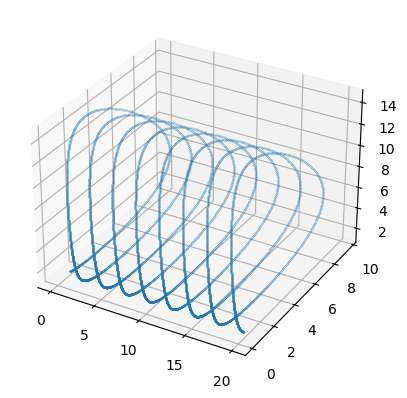

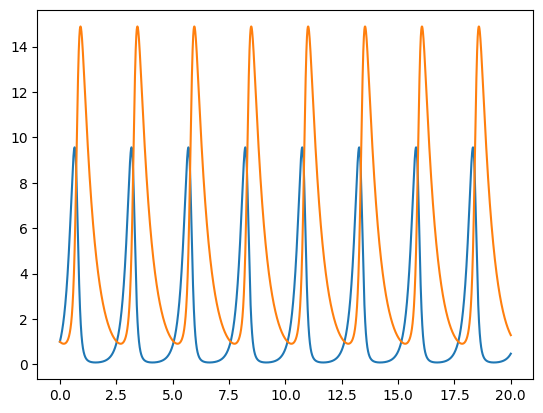

In [501]:
def lotka_volterra_rhs(xin, tin, pars):
  frhs = xin*0.0
  a, b, d, g = pars
  x, y = xin
  frhs[0] = a*x - b*x*y
  frhs[1] = d*x*y - g*y

  return frhs

t = np.linspace(0,20,10000)
xinit1= [1,1]
pars= [5, 1, 1, 2]
xtraj1 = scp.integrate.odeint(lotka_volterra_rhs, xinit1, t, (pars,))
xtraj1

ax = plt.figure().add_subplot(projection='3d')
ax.plot(t, xtraj1[:,0], xtraj1[:,1], '.', ms=0.3)
plt.show()
plt.plot(t, xtraj1[:,0])
plt.plot(t, xtraj1[:,1])

In [502]:
def compute_obs_traj(equation, t, pars, obs_error, xin):
    xtrue= scp.integrate.odeint(lotka_volterra_rhs, xin, t, (pars,))
    y_obs= xtrue*0.0
    for i in range(len(t)):
        y_obs[i] = obs_error.dot(xtrue[i]) + np.sqrt(r) * np.random.randn()
    print(y_obs)
    return xtrue, y_obs

t = np.linspace(0,20,100)
xin= [1,1]
pars= [5, 1, 1, 2]
hobs= np.array([[1,0],[0,1]])
r = 0.1
xtrue, y_obs= compute_obs_traj(lotka_volterra_rhs, t, pars, hobs, xin)
y_obs.shape

[[ 0.96286202  0.96286202]
 [ 2.02305243  0.66288942]
 [ 5.05724377  1.21462219]
 [ 8.39557386  2.71599654]
 [ 5.40625696 12.91155747]
 [ 1.04679349 14.16190643]
 [ 0.39444385 10.26975858]
 [ 0.37356748  7.18108206]
 [-0.43167617  4.17605765]
 [-0.08113495  3.00471532]
 [ 0.61083925  2.63005426]
 [-0.15727768  1.05423997]
 [ 0.73667633  1.18722729]
 [ 1.61290838  1.02788692]
 [ 3.18730967  0.74155593]
 [ 7.30862962  1.94499647]
 [ 8.64383478  7.25417443]
 [ 1.72678348 14.54634838]
 [-0.06938221 11.5594191 ]
 [ 0.24852983  8.46434145]
 [ 0.31761501  5.91514627]
 [ 0.8818222   4.65130619]
 [ 0.35204838  2.85522857]
 [-0.20554001  1.38569938]
 [ 0.09902599  0.93666548]
 [ 0.81883918  0.80912943]
 [ 2.38911016  1.01137676]
 [ 5.03105262  1.15875843]
 [ 8.77131674  3.11638681]
 [ 4.79151445 12.45696914]
 [ 1.160921   14.25703633]
 [-0.44354993  9.39845068]
 [ 0.12959201  6.91205318]
 [ 0.38680259  4.97710048]
 [ 0.49706527  3.57085272]
 [ 0.321762    2.33230628]
 [ 0.3417578   1.54614314]
 

(100, 2)

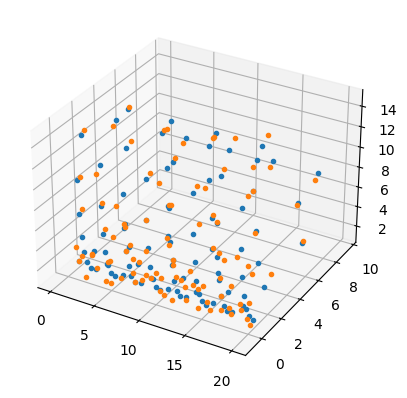

In [503]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(t, xtrue[:,0], xtrue[:,1], '.')
ax.plot(t, y_obs[:,0], y_obs[:,1], '.')
plt.show()

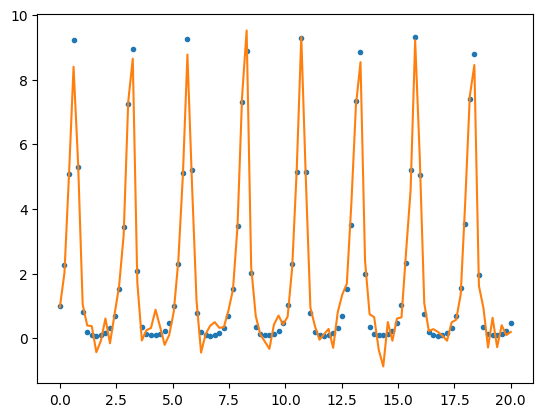

In [504]:
plt.plot(t, xtrue[:,0], '.')
plt.plot(t, y_obs[:,0])

In [505]:
# def lotka_volterra_rhs(x, pars):
#   # frhs = x*0.0
#   # a, b, d, g = pars
#   frhs= pars@xin.T

#   return frhs.T
def generate_true(xin, time):
  frhs = xin*0.0
  store_vec= []
  
  vec= xin
  for t in range(1, len(time)):
    store_vec.append(vec)
    dvec= pars@vec.T
    dt= time[t]-time[t-1]
    
    print(np.array(dt*dvec)[0]); print(type(dt*dvec))
    vec= vec + np.array(dt*dvec)[0]
  store_vec.append(vec)

  return np.array(store_vec)

def lotka_volterra_forward(xin, time, pars, K, y_obs, H):
  frhs = xin*0.0
  store_vec= []
  # a, b, d, g = pars
  # x, y = xin
  vec= xin
  for t in range(1, len(time)):
    store_vec.append(vec)
    gain_vec= K*(y_obs[t].T- H@xin.T)
    dvec= pars@vec.T + gain_vec
    dt= time[t]-time[t-1]
    # print(dt*dvec)
    vec= vec + np.array(dt*dvec)[0]
  store_vec.append(vec)

  return np.array(store_vec)

def lotka_volterra_backward(x_tilda, time, pars, K_prime, y_obs, H):

  store_vec= []
  vec= x_tilda.copy()
  
  for t in range(len(time)-1, 0, -1):
    store_vec.append(vec)
    gain_vec= K_prime*(y_obs[t].T- H@x_tilda.T)
    dvec= pars@vec.T - gain_vec
    dt= time[t]-time[t-1]
    # print(dt*dvec)
    vec= vec - np.array(dt*dvec)[0]
  store_vec.append(vec)

  return np.flip(store_vec, axis=0)


def back_forth_nudge(pars, t, K, K_back, H, y_obs, number_of_iterations): #once
  store_backward, store_forward=[], []
  #tilta, normal
  xin= np.mean(y_obs, axis=0)
  nudge= lotka_volterra_forward(xin, t, pars, 0.2, y_obs, hobs)
  store_forward.append(nudge)
  for it in range(number_of_iterations):
    nudge_back= lotka_volterra_backward(nudge[-1], t, pars, K_back, y_obs, H)
    nudge= lotka_volterra_forward(nudge_back[0], t, pars, K, y_obs, H)
    store_backward.append(nudge_back)
    store_forward.append(nudge)
  return store_forward, store_backward
          

[0.04040404 0.02020202]
<class 'numpy.matrix'>
[0.04203653 0.02061014]
<class 'numpy.matrix'>
[0.04373497 0.02102651]
<class 'numpy.matrix'>
[0.04550204 0.02145129]
<class 'numpy.matrix'>
[0.04734051 0.02188465]
<class 'numpy.matrix'>
[0.04925326 0.02232676]
<class 'numpy.matrix'>
[0.05124329 0.02277781]
<class 'numpy.matrix'>
[0.05331372 0.02323796]
<class 'numpy.matrix'>
[0.05546781 0.02370742]
<class 'numpy.matrix'>
[0.05770894 0.02418635]
<class 'numpy.matrix'>
[0.06004061 0.02467497]
<class 'numpy.matrix'>
[0.06246649 0.02517345]
<class 'numpy.matrix'>
[0.06499039 0.02568201]
<class 'numpy.matrix'>
[0.06761627 0.02620083]
<class 'numpy.matrix'>
[0.07034824 0.02673014]
<class 'numpy.matrix'>
[0.07319059 0.02727015]
<class 'numpy.matrix'>
[0.07614779 0.02782106]
<class 'numpy.matrix'>
[0.07922446 0.0283831 ]
<class 'numpy.matrix'>
[0.08242545 0.0289565 ]
<class 'numpy.matrix'>
[0.08575577 0.02954148]
<class 'numpy.matrix'>
[0.08922065 0.03013827]
<class 'numpy.matrix'>
[0.09282553 0

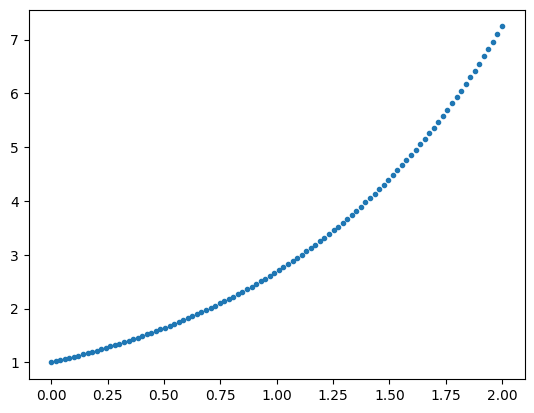

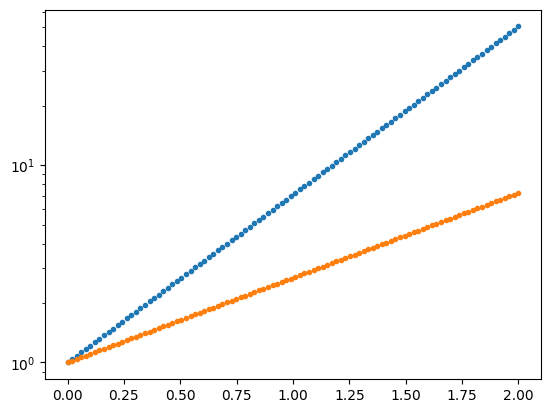

In [506]:
t = np.linspace(0,2,100)
xin= np.array([1.,1.])
pars= np.matrix([[2.,0.],[0.,1.]])
hobs= np.array([[1.,0.],[0.,1.]])
r = 1

xtrue= generate_true(xin, t)
y_obs= xtrue*0.0
for i in range(len(t)):
    y_obs[i] = hobs.dot(xtrue[i]) + np.sqrt(r) * np.random.randn()
print(y_obs)
    
    
# xtrue, y_obs= compute_obs_traj(lotka_volterra_rhs, t, pars, hobs, xin)
# y_obs.shape

plt.plot(t, xtrue[:,1], '.')
plt.show()
plt.semilogy(t, xtrue, '.')
# lotka_volterra_forward(y_obs, t, )

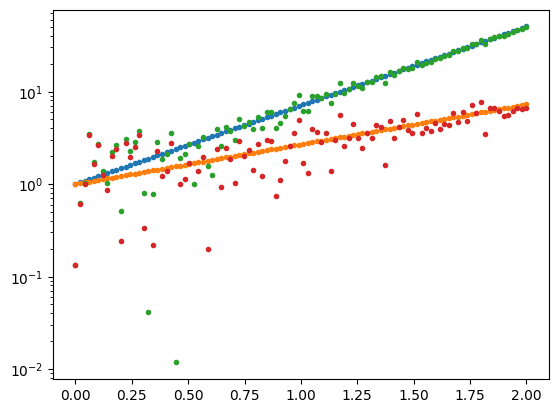

In [507]:
plt.semilogy(t, xtrue, '.')
plt.semilogy(t, y_obs, '.')

In [508]:
np.mean(y_obs, axis=0)

array([12.61121738,  3.02648626])

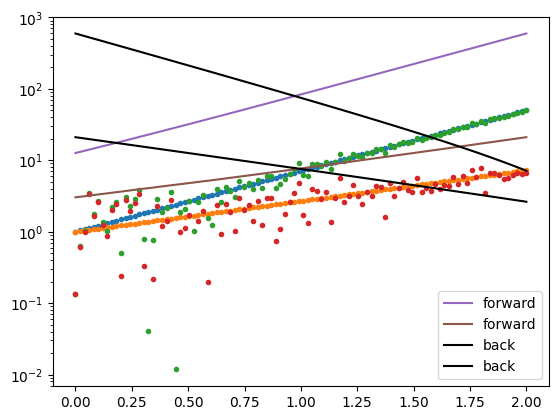

In [509]:
xin= np.mean(y_obs, axis=0)
nudge= lotka_volterra_forward(xin, t, pars, 0.2, y_obs, hobs)
nudge_back= lotka_volterra_backward(nudge[-1], t, pars, 0.01, y_obs, hobs)
# nudge= lotka_volterra_forward(nudge_back[0], t, pars, 0.2, y_obs, hobs)
# nudge_back= lotka_volterra_backward(nudge[-1], t, pars, 0.1, y_obs, hobs)
plt.semilogy(t, xtrue, '.')
plt.semilogy(t, y_obs, '.')
plt.semilogy(t, nudge, label="forward")
plt.semilogy(t, np.flip(nudge_back, axis=0), label="back", color="black")
plt.legend()

In [510]:
print(nudge[-1])
print(nudge_back[0])
print(np.flip(nudge_back, axis=0)[-1])

[594.65069315  21.0060061 ]
[7.1199285  2.62280737]
[7.1199285  2.62280737]


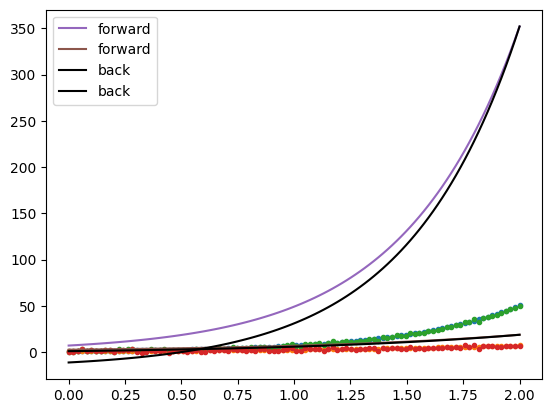

In [511]:
# xin= np.mean(y_obs, axis=0)
# nudge= lotka_volterra_forward(xin, t, pars, 0.2, y_obs, hobs)
# nudge_back= lotka_volterra_backward(nudge[-1], t, pars, 0.1, y_obs, hobs)
nudge= lotka_volterra_forward(nudge_back[0], t, pars, 0.1, y_obs, hobs)
nudge_back= lotka_volterra_backward(nudge[-1], t, pars, 0.1, y_obs, hobs)
plt.plot(t, xtrue, '.')
plt.plot(t, y_obs, '.')
plt.plot(t, nudge, label="forward")
plt.plot(t, nudge_back, label="back", color="black")
plt.legend()

In [512]:
t = np.linspace(0,2,100)
xin= np.array([1.,1.])
pars= np.matrix([[2.,0.],[0.,0.]])
hobs= np.array([[1.,0.],[0.,1.]])
cov_obs= np.array([[1.,1.],[0.,1.]])
r = 1

xtrue= generate_true(xin, t)
y_obs= xtrue*0.0
for i in range(len(t)):
    y_obs[i] = hobs.dot(xtrue[i]) + np.random.multivariate_normal(mean= [0,0], cov= cov_obs)
# print(y_obs)



[0.04040404 0.        ]
<class 'numpy.matrix'>
[0.04203653 0.        ]
<class 'numpy.matrix'>
[0.04373497 0.        ]
<class 'numpy.matrix'>
[0.04550204 0.        ]
<class 'numpy.matrix'>
[0.04734051 0.        ]
<class 'numpy.matrix'>
[0.04925326 0.        ]
<class 'numpy.matrix'>
[0.05124329 0.        ]
<class 'numpy.matrix'>
[0.05331372 0.        ]
<class 'numpy.matrix'>
[0.05546781 0.        ]
<class 'numpy.matrix'>
[0.05770894 0.        ]
<class 'numpy.matrix'>
[0.06004061 0.        ]
<class 'numpy.matrix'>
[0.06246649 0.        ]
<class 'numpy.matrix'>
[0.06499039 0.        ]
<class 'numpy.matrix'>
[0.06761627 0.        ]
<class 'numpy.matrix'>
[0.07034824 0.        ]
<class 'numpy.matrix'>
[0.07319059 0.        ]
<class 'numpy.matrix'>
[0.07614779 0.        ]
<class 'numpy.matrix'>
[0.07922446 0.        ]
<class 'numpy.matrix'>
[0.08242545 0.        ]
<class 'numpy.matrix'>
[0.08575577 0.        ]
<class 'numpy.matrix'>
[0.08922065 0.        ]
<class 'numpy.matrix'>
[0.09282553 0

C:\Users\adity\AppData\Local\Temp\ipykernel_8612\845605636.py:11: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  y_obs[i] = hobs.dot(xtrue[i]) + np.random.multivariate_normal(mean= [0,0], cov= cov_obs)


In [513]:
np.linalg.inv(cov_obs)

array([[ 1., -1.],
       [ 0.,  1.]])

In [514]:
K, K_back= 0.2,0.01
H= hobs
store_for, store_back=  back_forth_nudge(pars, t, K, K_back, H, y_obs, 1000)

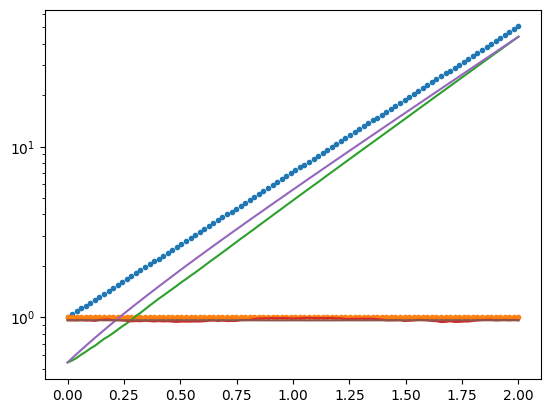

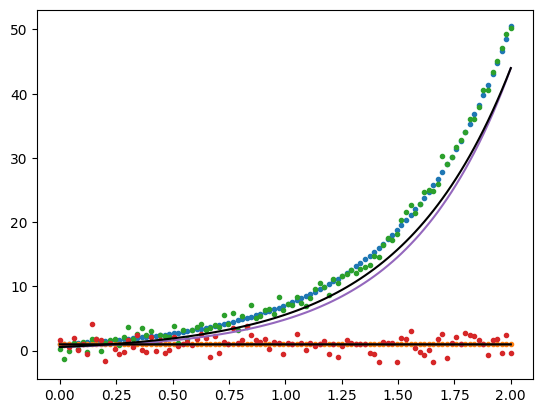

In [515]:
plt.semilogy(t, xtrue, '.')
# plt.semilogy(t, y_obs, '.')
# for it in range(len(store_back)):
#     plt.semilogy(t, store_for[it])
#     plt.semilogy(t, store_back[it])

plt.semilogy(t, store_for[-1])
plt.semilogy(t, store_back[-1])

plt.show()

plt.plot(t, xtrue, '.')
plt.plot(t, y_obs, '.')
plt.plot(t, store_for[-1], label="forward")
plt.plot(t,store_back[-1], label="back", color="black")

In [524]:
x_nonudge= generate_true(y_obs[0], t)

[0.01207602 0.        ]
<class 'numpy.matrix'>
[0.01256394 0.        ]
<class 'numpy.matrix'>
[0.01307157 0.        ]
<class 'numpy.matrix'>
[0.01359972 0.        ]
<class 'numpy.matrix'>
[0.0141492 0.       ]
<class 'numpy.matrix'>
[0.01472089 0.        ]
<class 'numpy.matrix'>
[0.01531567 0.        ]
<class 'numpy.matrix'>
[0.01593448 0.        ]
<class 'numpy.matrix'>
[0.0165783 0.       ]
<class 'numpy.matrix'>
[0.01724813 0.        ]
<class 'numpy.matrix'>
[0.01794503 0.        ]
<class 'numpy.matrix'>
[0.01867008 0.        ]
<class 'numpy.matrix'>
[0.01942442 0.        ]
<class 'numpy.matrix'>
[0.02020925 0.        ]
<class 'numpy.matrix'>
[0.02102578 0.        ]
<class 'numpy.matrix'>
[0.02187531 0.        ]
<class 'numpy.matrix'>
[0.02275916 0.        ]
<class 'numpy.matrix'>
[0.02367872 0.        ]
<class 'numpy.matrix'>
[0.02463544 0.        ]
<class 'numpy.matrix'>
[0.02563081 0.        ]
<class 'numpy.matrix'>
[0.0266664 0.       ]
<class 'numpy.matrix'>
[0.02774383 0.     

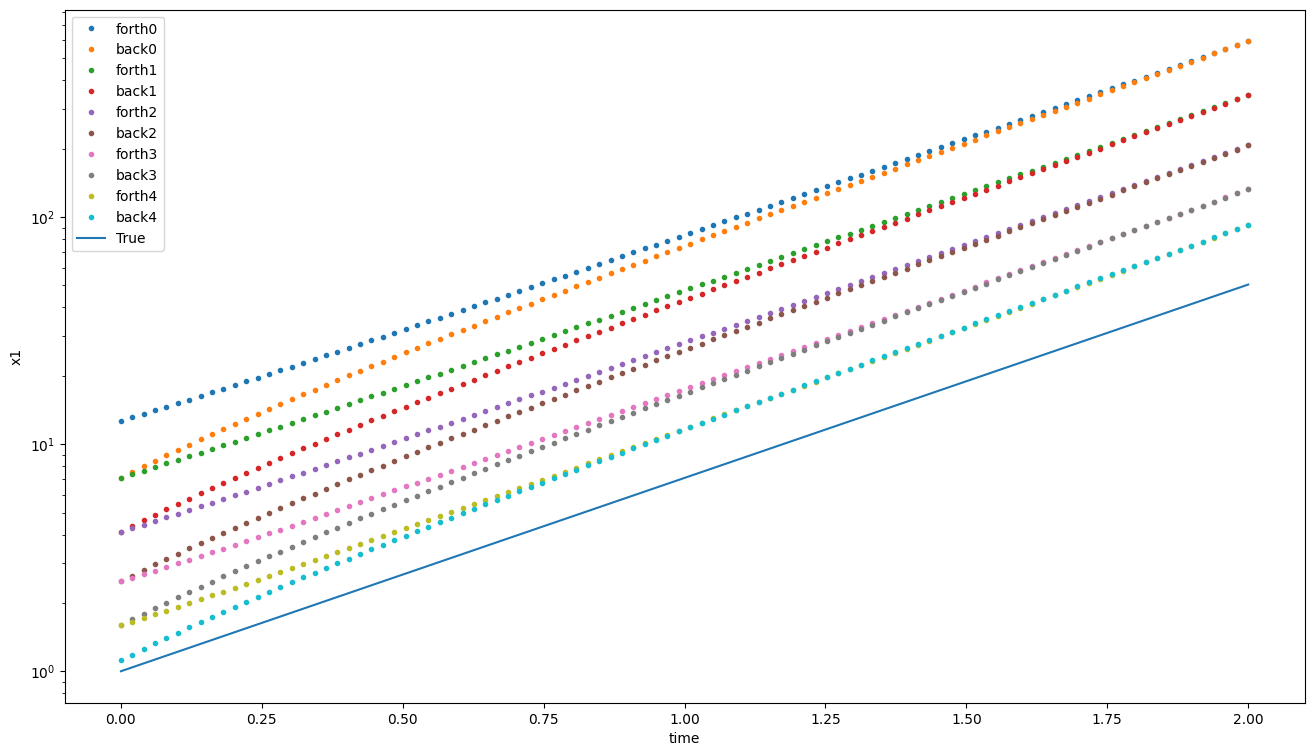

In [519]:
plt.figure(figsize=(16,9))
for it in range(5):
    plt.semilogy(t, store_for[it][:,0], ".", label= f"forth{it}")
    plt.semilogy(t, store_back[it][:,0], ".", label= f"back{it}")
plt.semilogy(t, xtrue[:,0], "-", label="True")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()

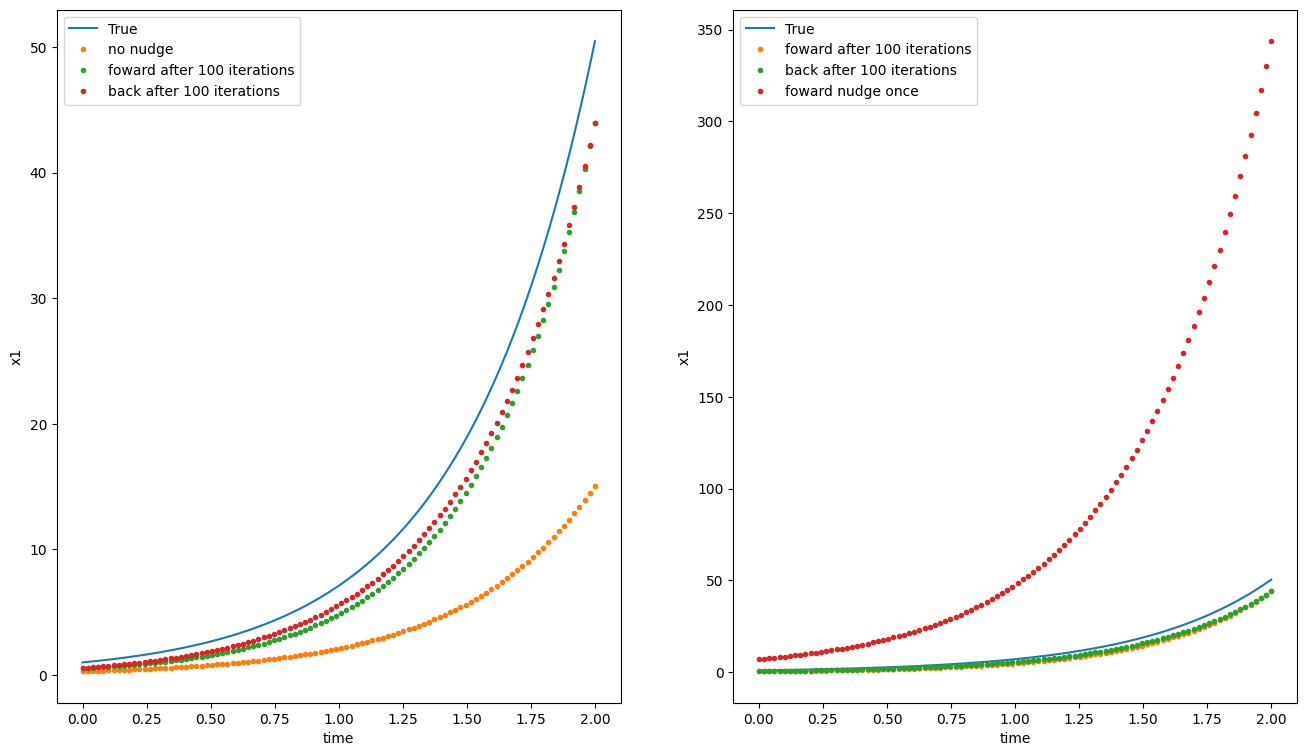

In [532]:
plt.figure(figsize=(16,9))
# for it in range(5):
plt.subplot(1,2,1)
it=-1
plt.plot(t, xtrue[:,0], "-", label="True")
plt.plot(t, x_nonudge[:,0], ".", label="no nudge")
plt.plot(t, store_for[it][:,0], ".", label= f"foward after 100 iterations")
plt.plot(t, store_back[it][:,0], ".", label= f"back after 100 iterations")

# plt.plot(t, store_for[1][:,0], ".", label= f"foward nudge once")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()

plt.subplot(1,2,2)
it=-1
plt.plot(t, xtrue[:,0], "-", label="True")
# plt.plot(t, x_nonudge[:,0], ".", label="no nudge")
plt.plot(t, store_for[it][:,0], ".", label= f"foward after 100 iterations")
plt.plot(t, store_back[it][:,0], ".", label= f"back after 100 iterations")

plt.plot(t, store_for[1][:,0], ".", label= f"foward nudge once")
plt.xlabel("time"); plt.ylabel("x1")

plt.legend()